## 課題：曽呂利新左衛門問題
「Pythonを使ってみよう」の問題で扱った紙を折ると月に届く話に似たものとして、曽呂利新左衛門の逸話があります。これを題材にプログラミングを進めます。  
> 秀吉から褒美を下される際、何を希望するか尋ねられた新左衛門は、今日は米1粒、翌日には倍の2粒、その翌日には更に倍の4粒と、日ごとに倍の量の米を100日間もらう事を希望した。米粒なら大した事はないと思った秀吉は簡単に承諾したが、日ごとに倍ずつ増やしていくと100日後には膨大な量になることに途中で気づき、他の褒美に変えてもらった。  

[曽呂利新左衛門-Wikipedia](https://ja.wikipedia.org/wiki/曽呂利新左衛門)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

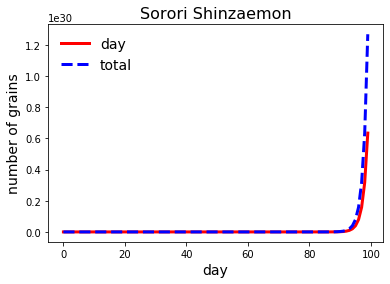

In [2]:
# 問題1　100日目の米粒の数
DAY = 100
total_grains = []  # 合計もらった米粒の数リスト
day_grains = []  # 1日にもらった米粒の数リスト

# 100日目までにもらえる米の数を数える
for i in range(DAY):  
    day_grains.append(2**i)
    total_grains.append(sum(day_grains))

fig = plt.figure(figsize=(6,4))
axes = fig.add_subplot(111)
axes.set_title('Sorori Shinzaemon', fontsize=16)
axes.set_xlabel('day', fontsize=14)
axes.set_ylabel('number of grains', fontsize=14)
axes.plot(day_grains, '-', linewidth=3, color='red', label='day')
axes.plot(total_grains, '--', linewidth=3, color='blue', label='total')
plt.legend(fontsize=14, frameon=False)
plt.show()

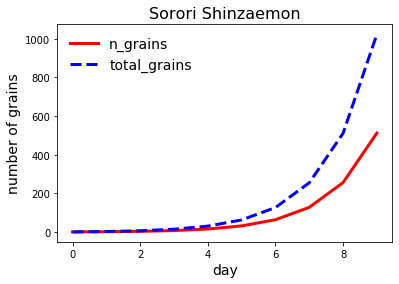

In [3]:
# 問題2 100日目以外の米粒の数
def compute_sorori_shinzaemon(day=100):
    """
    曽呂利新左衛門の米の逸話を検証する関数。日にちごとの米の粒の数を計算する。
    
    Parameteres
    ---------------
    day: int
        米をもらう日数 (default: 100)
    
    Returns
    ---------------
    list_n_grains: list
        ある日にもらう米の数リスト（リストの長さはdayに等しくなる）
    list_total_grains: list
        ある日までに累計でもらう米の数リスト（リストの長さはdayに等しくなる）
    """
    
    list_n_grains = []  # ある日にもらう米の数リスト
    list_total_grains = []  # ある日までに累計でもらう米の数リスト
    
    for i in range(day):  # 1日目からday日目までのループ
        list_n_grains.append(2**i)
        list_total_grains.append(sum(list_n_grains))
        
    return list_n_grains, list_total_grains


list_n_grains, list_total_grains = compute_sorori_shinzaemon(day=10)
fig = plt.figure(figsize=(6,4))
axes = fig.add_subplot(111)
axes.set_title('Sorori Shinzaemon', fontsize=16)
axes.set_xlabel('day', fontsize=14)
axes.set_ylabel('number of grains', fontsize=14)
axes.plot(list_n_grains, '-', linewidth=3, color='red', label='n_grains')
axes.plot(list_total_grains, '--', linewidth=3, color='blue', label='total_grains')
plt.legend(fontsize=14, frameon=False)
plt.show()

In [4]:
# 問題3 何人が何日生活できる米か
def compute_days_wecanlive(grains, human=1, male_ratio=0.5):
    """
    下記の前提条件のもと、もらった米粒の数で何人が何日間生活できるか計算する。
    
    ・前提条件
    ①米粒3250粒で150gとする。 (https://www.komenet.jp/_qa/chawanippai/chawan_ippai02.html)
    ②米100gで356kcalとする。
    ③1日に必要なカロリーは男性が2300kcal, 女性が1750kcalとする。(男女共30~49歳における値を引用）
    (https://www.mhlw.go.jp/file/05-Shingikai-10901000-Kenkoukyoku-Soumuka/0000083871.pdf)
    
    ・Parameters
    --------------
    grains: int (もらった米粒の数)
    human: int (人間の数 default:1)
    male_ratio: float (男性の比率 default:0.5)
    
    ・Returns
    ---------------
    days_wecanlive: int (生活可能な日数)
    """
    
    # 米粒からもらった米の総カロリーを計算
    grains_to_cal = grains * (150/3250) * (356/100)
    # 1日に必要なカロリー全員分
    human_need_cal = human * ((male_ratio*2300) + (1-male_ratio)*1750)
    # 何日生活できるか計算
    days_wecanlive = int(grains_to_cal // human_need_cal)
    
    return days_wecanlive